The goal for this project is to create a model predicting churn using the data obtained from the Telco databas by identifying what conditions and attributes are the largest drivers of churn. The deliverables from this project are acquire.py, prepare.py, telco.csv and final_presentation.ipynb.

In [1]:
# Preparing the notebook by importing necessary modules
from scipy import stats
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Acquire 

In [4]:
import acquire

In [5]:
# Loading the acquired data into a data frame called acquired. This is my raw data from the Codeup Student Database.
acquired= acquire.get_telco_data()

In [6]:
#Visualizing the column names, amount of nulls, amount of entries per column and column data types
acquired.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

#### Using .info, we are able to visualize that there are 7043 clients with telco.  The data types that make up the dataframe consist of integers, objects, and floats.

#### Visualizing the basic statistical details such as percentile, mean, std etc. of the numerical values in a data frame

In [7]:
# Dropping the Unnamed column before proceeding due to it being a int64 column
acquired= acquired.drop(columns=['Unnamed: 0'])

In [8]:
acquired.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


#### Plotting the distributions of the numerical columns

Text(0, 0.5, 'Count of Clients in each Tenure')

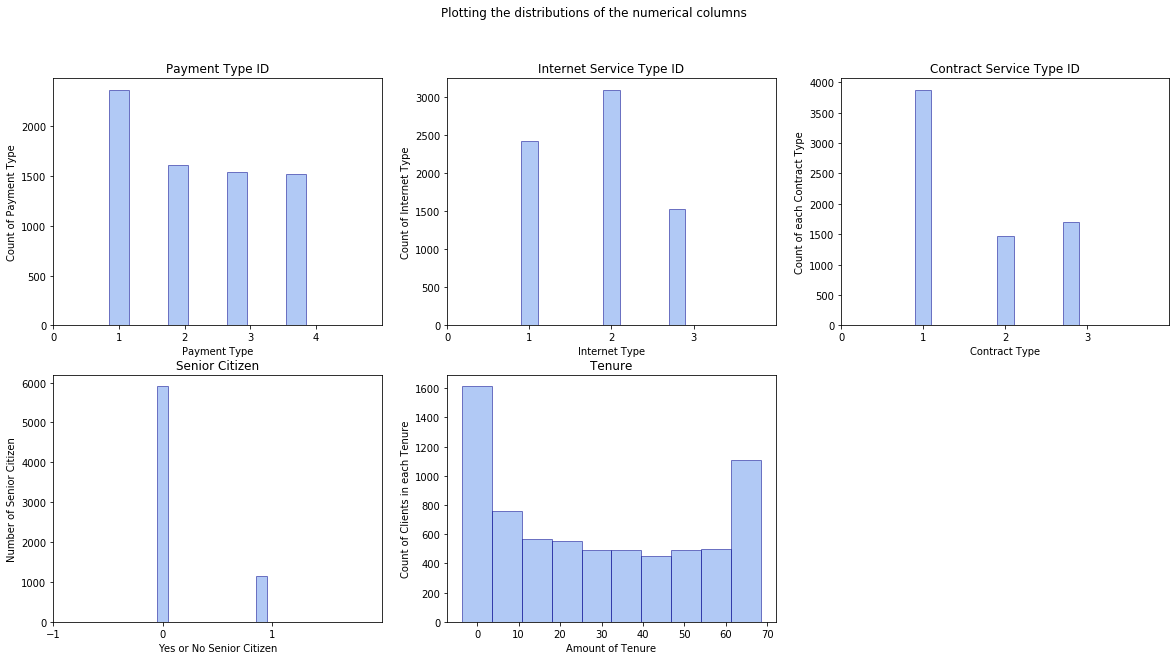

In [9]:
plt.figure(figsize=(20, 10))

plt.suptitle("Plotting the distributions of the numerical columns")
# row, columns, index
plt.subplot(2, 3, 1)
plt.hist(acquired.payment_type_id, align='left', edgecolor='darkblue', alpha=0.5, color='cornflowerblue')
plt.title('Payment Type ID')
plt.xlabel("Payment Type")
plt.ylabel("Count of Payment Type")
plt.xlim([0, 5])
plt.xticks(np.arange(0, 5, 1))

plt.subplot(2, 3, 2)
plt.hist(acquired.internet_service_type_id, align='left', edgecolor='darkblue', alpha=0.5, color='cornflowerblue')
plt.title('Internet Service Type ID')
plt.xlabel("Internet Type")
plt.ylabel("Count of Internet Type")
plt.xlim([0, 4])
plt.xticks(np.arange(0, 4, 1))

plt.subplot(2, 3, 3)
plt.hist(acquired.contract_type_id, align='left', edgecolor='darkblue', alpha=0.5, color='cornflowerblue')
plt.title('Contract Service Type ID')
plt.xlabel("Contract Type")
plt.ylabel("Count of each Contract Type")
plt.xlim([0, 4])
plt.xticks(np.arange(0, 4, 1))

plt.subplot(2, 3, 4)
plt.hist(acquired.senior_citizen, align='left', edgecolor='darkblue', alpha=0.5, color='cornflowerblue')
plt.title('Senior Citizen')
plt.xlabel("Yes or No Senior Citizen")
plt.ylabel("Number of Senior Citizen")
plt.xlim([0, 2])
plt.xticks(np.arange(-1, 2, 1))

plt.subplot(2, 3, 5)
plt.hist(acquired.tenure, align='left', edgecolor='darkblue', alpha=0.5, color='cornflowerblue')
plt.title('Tenure')
plt.xlabel("Amount of Tenure")
plt.ylabel("Count of Clients in each Tenure")

# Prepare 

In [10]:
import prepare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [11]:
# importing the cleaned telco data
telco = prepare.clean_telco()

In [12]:
# visualizing the cleaned telco data
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   multiple_lines         7043 non-null   object 
 2   monthly_charges        7043 non-null   float64
 3   total_charges          7043 non-null   object 
 4   contract_type          7043 non-null   object 
 5   internet_service_type  7043 non-null   object 
 6   payment_type           7043 non-null   object 
 7   monthly_tenure         7043 non-null   float64
 8   is_family              7043 non-null   bool   
 9   is_couple              7043 non-null   bool   
 10  is_senior              7043 non-null   bool   
 11  has_phones             7043 non-null   bool   
 12  has_paperless_billing  7043 non-null   bool   
 13  has_streaming          7043 non-null   bool   
 14  has_support_features   7043 non-null   bool   
 15  has_

In [13]:
#Describing the object columns
# describe object columns
obj_cols = telco.columns[[telco[col].dtype == 'O' for col in telco.columns]]
for col in obj_cols:
    print(telco[col].value_counts(),'\n', '\n')
    print(telco[col].value_counts(normalize=True, dropna=False))

Male      3555
Female    3488
Name: gender, dtype: int64 
 

Male      0.504756
Female    0.495244
Name: gender, dtype: float64
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64 
 

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: multiple_lines, dtype: float64
20.2       11
           11
19.75       9
20.05       8
19.9        8
           ..
5060.9      1
605.45      1
6743.55     1
662.95      1
1912.15     1
Name: total_charges, Length: 6531, dtype: int64 
 

20.2       0.001562
           0.001562
19.75      0.001278
20.05      0.001136
19.9       0.001136
             ...   
5060.9     0.000142
605.45     0.000142
6743.55    0.000142
662.95     0.000142
1912.15    0.000142
Name: total_charges, Length: 6531, dtype: float64
Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64 
 

Month-to-month    0.550192
Two year          0.2406

In [14]:
# sort = false will sort the bin values as opposed to the frequency counts
# value counts of monthly_charges by binning
telco.monthly_charges.value_counts(bins=5, sort=False)

(18.148999999999997, 38.35]    1797
(38.35, 58.45]                 1005
(58.45, 78.55]                 1367
(78.55, 98.65]                 1826
(98.65, 118.75]                1048
Name: monthly_charges, dtype: int64

In [15]:
# Checking the dataframe for null values
missing = telco.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

### Findings:
<ul>
<li> Initial findings are that tere are no nulls in the dataframe. Also, about 60% of clients pay over $58.45 for their services.
<li> The the data was cleaned by making columns into booleans instead of string object columns. A dummy variable for churn and the single variable object columns were then concatenated into the data frame.
<li> The data was further cleaned by getting rid of the id columns from the sql join statements and the duplicated non simplified columns were dropped as well.
<li> All names of columns were made into python friendly names in order to make calling them more streamlined later.
<li> Finally all data was split into train, validate and test. The parameters used were: test_size=.2, random_state=123, stratify=df.is_churn.




## Hypothesis Testing
### First Hypothesis
$H_0$: A clients length of monthly tenure has no effect on churn rate. <br> 

$H_a$: Clients with a lower monthly tenure churn at a higher rate than those with a longer tenure. <br> 

alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

In [16]:
n = telco.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
null_hypothesis = "a clients length of monthly tenure has no effect on churn rate."

In [17]:
r, p = stats.pearsonr(telco.monthly_tenure, telco.is_churn)
r, p

(-0.352228670113078, 7.999057960599509e-205)

In [18]:
#Comparing my p value against my α
p > α

False

In [19]:
if p > α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We reject the null hypothesis that a clients length of monthly tenure has no effect on churn rate.


### Second Hypothesis
$H_0$: Whether a client has a family or has only a partner has no correlation with churn. <br>
$H_a$: Clients with a family are correlated with a higher rate of churn than those with only a partner.

In [20]:
x1 = telco[telco.is_family == True].is_churn
x2 = telco[telco.is_couple == True].is_churn

xbar1 = x1.mean()
xbar2 = x2.mean()

n1 = x1.shape[0]
n2 = x2.shape[0]

s1 = x1.std()
s2 = x2.std()

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

-3.959384698396423

In [21]:
p = stats.t(degf).sf(t) * 2

print(f't = {t:.5f}')
print(f'p = {p:.5f}')
stats.ttest_ind(x1, x2)

t = -3.95938
p = 1.99992


Ttest_indResult(statistic=-3.959384698396423, pvalue=7.608984832866785e-05)

In [22]:
null_hypothesis = "whether a client has a family or has only a partner has no correlation with churn"

if p > α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
elif t < 0 :
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We fail to reject the null hypothesis. The null hypothesis is that whether a client has a family or has only a partner has no correlation with churn


### Third Hypothesis

$H_0$: A client having a family has no correlation with monthly charges. <br>
$H_a$: Clients with a family are correlated with a higher rate of monthly charges.

In [23]:
families = telco[telco.is_family == True]

μ = telco.monthly_charges.mean()
xbar = families.monthly_charges.mean()
s = families.monthly_charges.std()
n = families.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))
t

-7.688925356560659

In [24]:
null_hypothesis = "a client having a family has no correlation with monthly charges."

if p >  α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
elif t < 0 :
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We fail to reject the null hypothesis. The null hypothesis is that a client having a family has no correlation with monthly charges.


## Data Exploration & Analysis

In [25]:
np.random.seed(123)

In [27]:
train, validate, test = prepare.prep_telco_data()

In [28]:
train.head(3)

,gender,multiple_lines,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,monthly_tenure,is_family,is_couple,is_senior,has_phones,has_paperless_billing,has_streaming,has_support_features,has_security_features,is_churn
5670,Male,No,20.35,122,Month-to-month,None,Credit card (automatic),0.416667,True,False,False,True,False,False,False,False,0
4152,Female,No,89.25,487.05,Month-to-month,Fiber optic,Electronic check,0.500000,False,False,False,True,True,False,True,False,0
4890,Male,No,84.40,4484.05,One year,Fiber optic,Electronic check,4.500000,False,False,False,True,False,False,True,True,0


Text(0, 0.5, 'Number of Churned Clients')

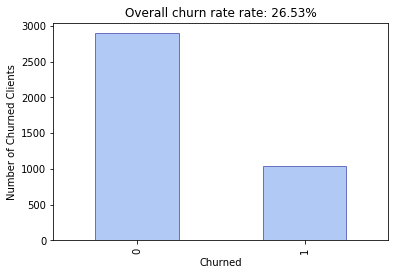

In [29]:
# Calculating and showing the overall churn rate
train.is_churn.value_counts().sort_index().plot.bar(color='cornflowerblue', edgecolor='darkblue', alpha=0.5)
survival_rate = train.is_churn.mean()
plt.title(f"Overall churn rate rate: {survival_rate:.2%}")
plt.xlabel('Churned')
plt.ylabel("Number of Churned Clients")

In [30]:
# sort = false will sort the bin values as opposed to the frequency counts
# value counts of monthly_charges by binning
train.monthly_charges.value_counts(bins=5, sort=False)

(18.148999999999997, 38.32]     989
(38.32, 58.39]                  578
(58.39, 78.46]                  775
(78.46, 98.53]                 1002
(98.53, 118.6]                  599
Name: monthly_charges, dtype: int64

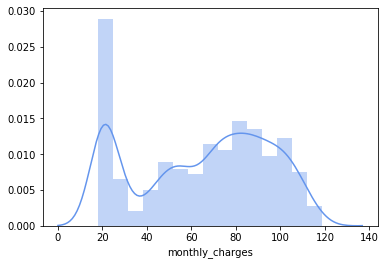

In [31]:
#visualizing the distribution of monthly charges
sns.distplot(train.monthly_charges, color='cornflowerblue')

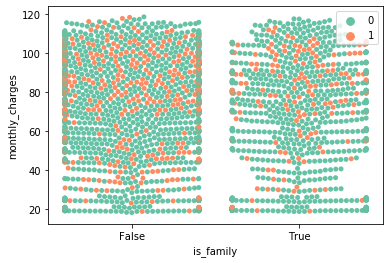

In [32]:
sns.swarmplot(x="is_family", y="monthly_charges", data=train, hue="is_churn", palette="Set2")
plt.legend()

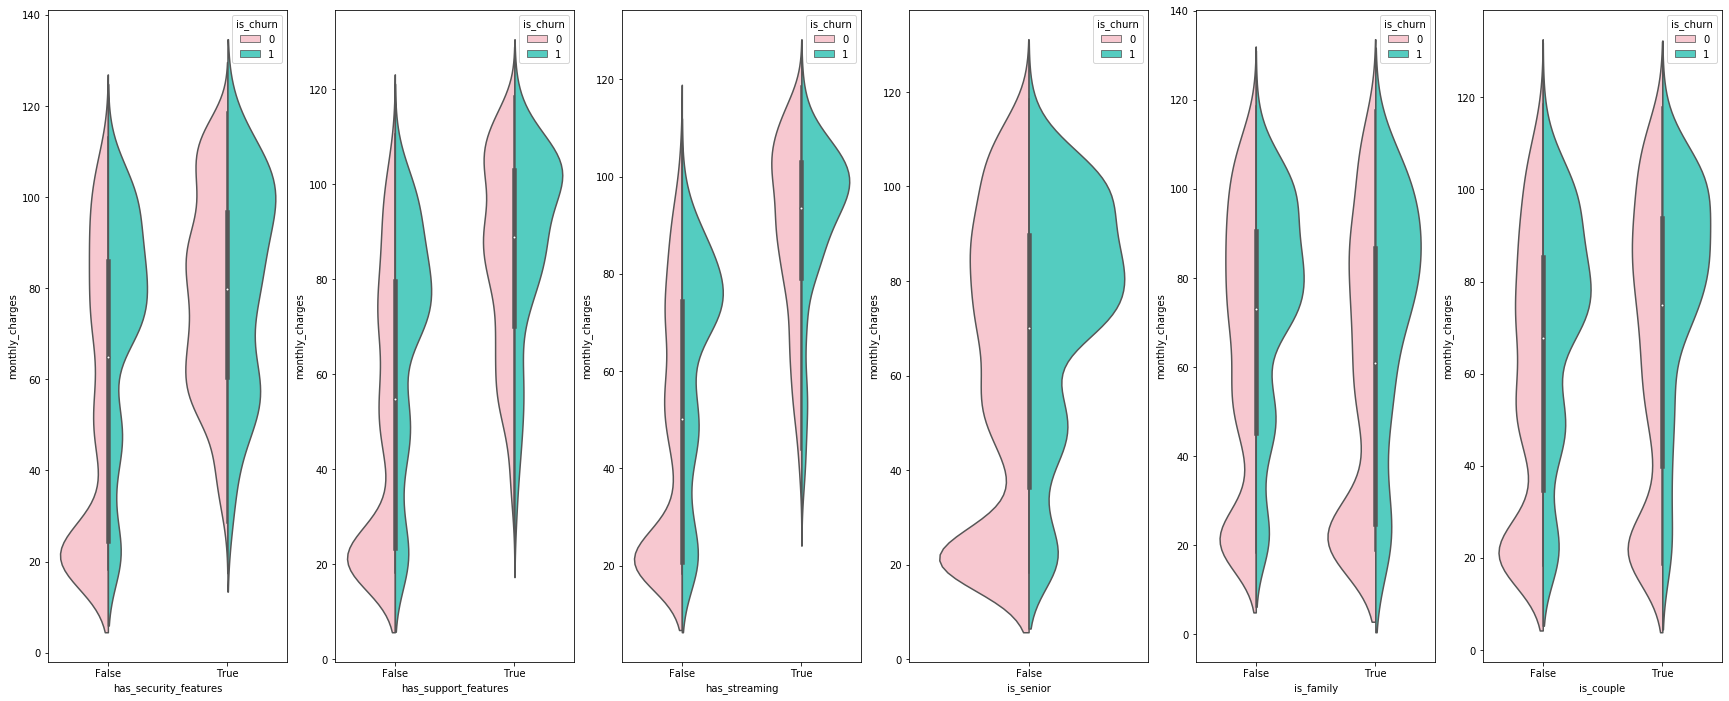

In [33]:
features = ["has_security_features", 'has_support_features', "has_streaming", "is_senior", "is_family",  "is_couple"]
_, ax = plt.subplots(nrows=1, ncols=6, figsize=(30, 12))

for i, feature in enumerate(features):
    sns.violinplot(
        feature,
        "monthly_charges",
        hue="is_churn",
        data=train,
        split=True,
        ax=ax[i],
        palette=["pink", "turquoise"],
    )

In [34]:
#Making a baseline prediction
telco.is_churn.value_counts()

0    5174
1    1869
Name: is_churn, dtype: int64

In [35]:
#concatenating the baseline prediction to the df
telco['baseline_prediction'] = 'not_churn'

### Findings:
<ul>
<li> Clients who are non seniors will churn pay a higher monthly charge than non seniors that choose not to churn.
<li> Clients with premium features such as secutiry features and streaming pay a higher monthly charge are more likely to churn than those who pay lower cost or have no premium features.
<li> Clients who are part of a family are also more likely to pay more and slightly more likely to churn.
<li> At the time of data collection, 14.22% of clients are paying between $ 78.46 and $ 98.53 for monthly charges while 8.5% of customers pay over $98.53 for monthly charges.
<li> Overall, clients are more likely to not churn.
</u.><br>

## Modeling and Evaluation

In [37]:
#Making Train Validate Test and Split
X = telco[["has_security_features", 'has_support_features', "has_streaming", "is_senior", "is_family",  "is_couple"]]
y = telco[['is_churn']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (3943, 6) , validate:  (1691, 6) , test:  (1409, 6)
train:  (3943, 1) , validate:  (1691, 1) , test:  (1409, 1)


### Logistic Regression
#### Computing the Logistic Regression Model

In [38]:
# setting up the linear regression object
# C (Inverse of regularization strength) = 1
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [39]:
# fitting the logit to the x train and y train
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
#Estimate whether or not a client would churn, using the training data
y_pred_1 = logit.predict(X_train)
#Estimate the probability of a client churning, using the training data
y_pred_proba_1 = logit.predict_proba(X_train)


##### Evaluating the Logistic Regression Model

In [41]:
# Compute Precision, Recall, F1-score, and Support
print(classification_report(y_train, y_pred_1))
print('The accuracy of the Logistic Regression classifier on training set: {:.2f}'.format(logit.score(X_train, y_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2896
           1       0.27      1.00      0.42      1047

    accuracy                           0.27      3943
   macro avg       0.13      0.50      0.21      3943
weighted avg       0.07      0.27      0.11      3943

The accuracy of the Logistic Regression classifier on training set: 0.27


<b><i>Precision:</b></i> Churn was identified 27% of the the time.<br>
<b><i>Recall:</b></i> The recall score is high for predicting churn
which means alot of churn was not missed, however as a result there is a low precision rate.<br>
<b><i>f1-score: </b></i>The f1 score is 42%. This means that the recall and precision don't have equal weight. This is evident by the low precision and high recall. <br>
<b><i>Support: </b></i> There are 1047 instances of the y being true.

#### Evaluating the Logistic Regression Models against the Validate (unseen) data

In [42]:
y_pred1 = logit.predict(X_validate)

print(classification_report(y_validate, y_pred1))
print('The accuracy of the Logistic Regression classifier on validate set: {:.2f}'.format(logit.score(X_validate, y_validate)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1253
           1       0.26      1.00      0.41       438

    accuracy                           0.26      1691
   macro avg       0.13      0.50      0.21      1691
weighted avg       0.07      0.26      0.11      1691

The accuracy of the Logistic Regression classifier on validate set: 0.26


<b><i>Precision:</b></i> Churn was identified 26% of the the time.<br>
<b><i>Recall:</b></i> The recall score is high which means alot of churn was not missed, however as a result there is a low precision rate.<br>
<b><i>f1-score: </b></i>The f1 score is 41%. This means that the recall and precision don't have equal weight. This is evident by the low precision and high recall. <br>
<b><i>Support: </b></i> There are 1691 instances of the y being true.

### Decision Tree

In [43]:
#Making Train Validate Test and Split
X = telco[["has_security_features", 'has_support_features', "has_streaming", "is_senior", "is_family",  "is_couple"]]
y = telco[['is_churn']]

X_train_validate2, X_test2, y_train_validate2, y_test2 = train_test_split(X, y, test_size = .20, random_state = 123)

X_train2, X_validate2, y_train2, y_validate2 = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train2.shape, ", validate: ", X_validate2.shape, ", test: ", X_test2.shape)
print("train: ", y_train2.shape, ", validate: ", y_validate2.shape, ", test: ", y_test2.shape)

train:  (3943, 6) , validate:  (1691, 6) , test:  (1409, 6)
train:  (3943, 1) , validate:  (1691, 1) , test:  (1409, 1)


In [44]:
# Create the Decision Tree Object
clf = DecisionTreeClassifier(max_depth=10, random_state=123)

In [45]:
# Fit the model to the training data
clf.fit(X_train2, y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

##### Evaluating the Decision Tree Model

In [46]:
clf.score(X_train2, y_train2)
#make a prediction with traning data
y_pred_2 = clf.predict(X_train2)
#estimate prob of churn with training data
y_pred_proba_2 = clf.predict_proba(X_train2)

In [47]:
## Printing a classification report
print(classification_report(y_train2, y_pred_2))
print('The accuracy of the Decision Tree classifier on the training set: {:.2f}'.format(clf.score(X_train2, y_train2)))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      2896
           1       0.52      0.12      0.19      1047

    accuracy                           0.74      3943
   macro avg       0.63      0.54      0.52      3943
weighted avg       0.69      0.74      0.67      3943

The accuracy of the Decision Tree classifier on the training set: 0.74


<b><i>Precision:</b></i> Not Churn was identified 75% of the the time. While churn was identified 52% of the time.<br>
<b><i>Recall:</b></i> The recall score is high for not churn which means alot of the not churn was not missed. However the recall score for churn was low.<br>
<b><i>f1-score: </b></i>The f1 score is 74%. This means that the recall and precision have close to equal weight. This is evident by the high precision and high recall for not churn. <br>
<b><i>Support: </b></i> There are 3943 instances of the y being true.

#### Evaluating the Decision Tree Model against the Validate (unseen) data

In [48]:
# Evaluate the Model with the validate dataset
clf.score(X_validate2, y_validate2)

print(classification_report(y_train2, y_pred_2))
print('The accuracy of Decision Tree on validate set: {:.2f}'.format(clf.score(X_validate2, y_validate2)))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      2896
           1       0.52      0.12      0.19      1047

    accuracy                           0.74      3943
   macro avg       0.63      0.54      0.52      3943
weighted avg       0.69      0.74      0.67      3943

The accuracy of Decision Tree on validate set: 0.75


### Random Forest Model

In [49]:
#Making Train Validate Test and Split
X = telco[["has_security_features", 'has_support_features', "has_streaming", "is_senior", "is_family",  "is_couple"]]
y = telco[['is_churn']]

X_train_validate3, X_test3, y_train_validate3, y_test3 = train_test_split(X, y, test_size = .20, random_state = 123)

X_train3, X_validate3, y_train3, y_validate3 = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train3.shape, ", validate: ", X_validate3.shape, ", test: ", X_test3.shape)
print("train: ", y_train3.shape, ", validate: ", y_validate3.shape, ", test: ", y_test3.shape)

train:  (3943, 6) , validate:  (1691, 6) , test:  (1409, 6)
train:  (3943, 1) , validate:  (1691, 1) , test:  (1409, 1)


In [50]:
# setting up the random forest object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=30,
                            n_estimators=150,
                            max_depth=25, 
                            random_state=123)

In [51]:
# fitting the train data to the rf
rf.fit(X_train3, y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [52]:
# Estimate whether or not a client would churn, using the training data
y_pred_3 = rf.predict(X_train3)

In [53]:
# Estimate the probability of a client churning, using the training data
y_pred_proba_3 = rf.predict_proba(X_train3)

##### Evaluating the Random Forest Model

In [54]:
#computing the accuracy of the random forest classifier on the training set
rf.score(X_train3, y_train3)

0.7367486685265027

In [55]:
print(classification_report(y_train3, y_pred_3))
print('Accuracy of Random Forest Model on training set: {:.2f}'.format(rf.score(X_train3, y_train3)))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      2896
           1       0.52      0.12      0.19      1047

    accuracy                           0.74      3943
   macro avg       0.63      0.54      0.52      3943
weighted avg       0.69      0.74      0.67      3943

Accuracy of Random Forest Model on training set: 0.74


<b><i>Precision:</b></i> Not Churn was identified 75% of the the time and Churn was identified 52% of the time.<br>
<b><i>Recall:</b></i> The recall score is high for not churn which means alot of the not churn was not missed. <br>
<b><i>f1-score: </b></i>The f1 score is 84%. This means that the recall and precision have close to equal weight. This is evident by the high precision and high recall for not churn. <br>
<b><i>Support: </b></i> There are 3943 instances of the y being true.

#### Evaluating the Random Forest Model against the Validate (unseen) data

In [56]:
# Evaluate the Model with the validate dataset
rf.score(X_validate3, y_validate3)

print(classification_report(y_train3, y_pred_3))
print('The accuracy of Decision Tree on validate set: {:.2f}'.format(rf.score(X_validate2, y_validate2)))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      2896
           1       0.52      0.12      0.19      1047

    accuracy                           0.74      3943
   macro avg       0.63      0.54      0.52      3943
weighted avg       0.69      0.74      0.67      3943

The accuracy of Decision Tree on validate set: 0.75


### K Nearest Neighbor (KNN) Model

In [57]:
#Making Train Validate Test and Split
X = telco[["has_security_features", 'has_support_features', "has_streaming", "is_senior", "is_family",  "is_couple"]]
y = telco[['is_churn']]

X_train_validate4, X_test4, y_train_validate4, y_test4 = train_test_split(X, y, test_size = .20, random_state = 123)

X_train4, X_validate4, y_train4, y_validate4 = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train4.shape, ", validate: ", X_validate4.shape, ", test: ", X_test4.shape)
print("train: ", y_train4.shape, ", validate: ", y_validate4.shape, ", test: ", y_test4.shape)

train:  (3943, 6) , validate:  (1691, 6) , test:  (1409, 6)
train:  (3943, 1) , validate:  (1691, 1) , test:  (1409, 1)


In [58]:
#Creating the KNN Object
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')

In [59]:
#Fit the KNN model to the training data
knn.fit(X_train4, y_train4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [60]:
#Estimate whether or not a client would churn, using the training data
y_pred_4 = knn.predict(X_train4)
#Estimate the probability of a client churning, using the training data
y_pred_proba_4 = knn.predict_proba(X_train4)

##### Evaluating the KNN Model

In [61]:
#Computing Precision, Recall, F1-score, and Support
knn.score(X_train4, y_train4)
print(classification_report(y_train4, y_pred_4))
print('The accuracy of the KNN classifier on training set: {:.2f}'.format(knn.score(X_train4, y_train4)))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84      2896
           1       0.45      0.08      0.13      1047

    accuracy                           0.73      3943
   macro avg       0.60      0.52      0.49      3943
weighted avg       0.67      0.73      0.65      3943

The accuracy of the KNN classifier on training set: 0.73


<b><i>Precision:</b></i> Not Churn was identified 74% of the the time.<br>
<b><i>Recall:</b></i> The recall score is high for not churn which means alot of the not churn was not missed. <br>
<b><i>f1-score: </b></i>The f1 score is 84%. This means that the recall and precision have close to equal weight. This is evident by the high precision and high recall for not churn. <br>
<b><i>Support: </b></i> There are 3943 instances of the y being true.

#### Evaluating the KNN Model against the Validate (unseen) data

In [62]:
# Evaluate the Model with the validate dataset
knn.score(X_validate4, y_validate4)

print(classification_report(y_train4, y_pred_4))
print('The accuracy of KNN on validate set:{:.2f}'.format((knn.score(X_validate4, y_validate4))))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84      2896
           1       0.45      0.08      0.13      1047

    accuracy                           0.73      3943
   macro avg       0.60      0.52      0.49      3943
weighted avg       0.67      0.73      0.65      3943

The accuracy of KNN on validate set:0.72


### Modeling Summary
<ul>
<li>The baseline model was created by predicting the no churn every time.
<li>Each model has been evaluated based on accuracy, precision and recall.
<li>The model that is the best fit has the highest accuracy as it will correctly predict who is churning and who is not churning.
<li>The best fitting models for the data are the decision tree and random forest. Those two have an accuracy of predicting who is churning 75% of the time.

In [65]:
print('The accuracy of the Decision Tree classifier on the test set: {:.2f}'.format(clf.score(X_test2, y_test2)))
print('The accuracy of the Random Forest classifier on the test set: {:.2f}'.format(rf.score(X_test3, y_test3)))

The accuracy of the Decision Tree classifier on the test set: 0.75
The accuracy of the Random Forest classifier on the test set: 0.75


## Conclusion


<ul>
    <li>Clients who are non-seniors, who have premium features such a streaming, security features and support features are more likely to churn and they are paying a higher monthly cost. Clients who either have a partner or a family also are likely to pay more. 

 <li> Through analyzing the data, we have found that the customers who churn are paying more. This can be explained by the additional features that many customers have.

 <li> If more time was allotted,  the data science team would evaluate which contract option has the highest amount of churn.


 <li> Next steps would be to find out what each specific features cost, evaluate which group of non-seniors are churning (ie. college age vs middle adult) and what competitors pricing for similar features are.

<li> My recommendation to retain customers would be to investigate offering bundle deals and having customers sign contracts to reduce the churn with the company.